In [2]:
import pandas as pd
from config import BASE_DIR
import numpy as np

In [3]:
exp_dir = f"{BASE_DIR}/experiments/sectarian_similarities"
df_name = "filtered_df_CHUNK_SIZE=100_MAX_OVERLAP=15_PRE_PROCESSING_TASKS=[]_2024_28_08"
df = pd.read_csv(f"{BASE_DIR}/data/processed_data/{df_name}.csv")
df  

,book,sentence_path,text_lex,text,n_words_lex,n_words,construct to absolute nouns ratio,construct nouns and adjectives percentage,noun to verb ratio,definite_article_percentage,...,oM percentage,kya percentage,all conjunctions percentage,non-finite to finite verbs ratio,passive verb forms percentage,total word count,bib,section,composition,genre
0,CD,CD:1:1-1:12,שמע כל ידע צדק בין מעשה אל ריב ל כל בשר משפט ע...,ועתה שמעו כל יודעי צדק ובינו במעשי אל כי ריב ל...,88,100,0.684211,0.120370,2.111111,0.925926,...,0.0,0.0,21.296296,0.384615,0.000000,108.0,nonbib,sectarian_texts,CD,CD
1,CD,CD:1:12-2:1,דור אחרון עשה דור אחרון עדה בגד הם סור דרך היא...,לדורות אחרונים את אשר עשה בדור אחרון בעדת בוגד...,91,103,0.541667,0.120370,1.344828,4.629630,...,0.0,0.0,14.814815,0.705882,0.000000,108.0,nonbib,sectarian_texts,CD,CD
2,CD,CD:2:1-2:11,אל עדה שמם כל המון מעשה נדה פנה שמע אל כל בוא ...,אל בעדתם להשם את כל המונם ומעשיהם לנדה לפניו ו...,94,110,0.468750,0.145299,2.136364,0.854701,...,0.0,0.0,17.948718,1.000000,1.709402,117.0,nonbib,sectarian_texts,CD,CD
3,CD,CD:2:11-2:21,כל קום ל קריא שם יתר פליטה ארץ מלא פנה תבל זרע...,ובכולם הקים לו קריאי שם למען התיר פליטה לארץ ו...,90,113,1.117647,0.176471,1.333333,0.840336,...,0.0,0.0,18.487395,0.421053,1.680672,119.0,nonbib,sectarian_texts,CD,CD
4,CD,CD:2:21-3:10,רצון שמר מצוה עשה חרה אף ב ב תעה בן נח משפחה ב...,רצונם ולא שמרו את מצות עשיהם עד אשר חרה אפו בם...,95,105,1.200000,0.107143,0.935484,3.571429,...,0.0,0.0,20.535714,0.240000,8.035714,112.0,nonbib,sectarian_texts,CD,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1233,11Q20,11Q20:14:9-14:17,קבר טהר חק משפט זה טהר משפט תורה זה טמא הוא טמ...,בקבר וטהר כחוק המשפט הזה ואם לוא יטהר כמשפט הת...,76,86,0.400000,0.106383,1.842105,19.148936,...,0.0,0.0,26.595745,0.055556,1.063830,94.0,nonbib,unknown,Temple Scroll,NaN
1234,11Q20,11Q20:14:17-14:26,חלד עכבר צב מין לטאה כח חמט תנשמת כל איש נגע ב...,חולד והעכבר והצב למינו והלטאה והכח והחמט והתנש...,79,97,0.296296,0.075472,1.590909,13.207547,...,0.0,0.0,28.301887,0.157895,1.886792,106.0,nonbib,unknown,Temple Scroll,NaN
1235,11Q20,11Q20:14:26-15:6,נבלה עור בשר צפרן כבס בגד רחץ מים בוא שמש טהר ...,ומנבלתמה עור ובשר וצפורן וכבס בגדיו ורחץ במים ...,82,98,0.360000,0.087379,1.275862,9.708738,...,0.0,0.0,25.242718,0.380952,0.000000,103.0,nonbib,unknown,Temple Scroll,NaN
1236,11Q20,11Q20:15:6-16:7,חטאה צדק צדק רדף חיה בוא ירש ארץ אנכי נתן ל יר...,החטאה צדק צדק תרדוף למען תחיה ובאתה וירשתה את ...,84,108,0.470588,0.068376,1.136364,8.547009,...,0.0,0.0,21.367521,0.222222,0.854701,117.0,nonbib,unknown,Temple Scroll,NaN


In [4]:
print("Unique scroll per section:")
print(df.groupby("section")["book"].nunique())
print("number of chunks per section:")
print(df.groupby("section")["sentence_path"].count())

Unique scroll per section:
section
non_sectarian_texts     8
sectarian_texts        39
unknown                24
Name: book, dtype: int64
number of chunks per section:
section
non_sectarian_texts     80
sectarian_texts        718
unknown                377
Name: sentence_path, dtype: int64


In [5]:
from src.baselines.embeddings import  VectorizerProcessor
vectorizers = [ 'yonatanlou/BEREL-finetuned-DSS-maskedLM', 'dicta-il/dictabert' ]

processor = VectorizerProcessor(df, f"{exp_dir}/{df_name}.pkl", vectorizers)
processed_vectorizers = processor.load_or_generate_embeddings()

Loaded the embeddings: ['yonatanlou/BEREL-finetuned-DSS-maskedLM', 'dicta-il/dictabert']
Loaded the following embeddings dict_keys(['yonatanlou/BEREL-finetuned-DSS-maskedLM', 'dicta-il/dictabert'])


In [6]:
embeddings = processed_vectorizers[vectorizers[0]]
embeddings.shape

(1238, 768)

In [7]:

def cosine_similarity(mean_embedding_sec_core, embeddings):
    mean_embedding_norm = mean_embedding_sec_core / np.linalg.norm(mean_embedding_sec_core)
    embeddings_norm = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
    cosine_similarities = np.dot(embeddings_norm, mean_embedding_norm)
    
    return cosine_similarities
curr_embedding= vectorizers[0]
embeddings = processed_vectorizers[curr_embedding]
core_sec_scrolls =["1QS", "1QHa", "1QM", "CD"]
all_idx_no_core_sec = df[df["book"].isin(core_sec_scrolls)].index
mean_embedding_sec_core = np.mean(embeddings[all_idx_no_core_sec], axis=0)
# Those are of interest: שירות עילת השבת, דברי המאורות, temple scroll, ברכי נפשי,

#similiarities per chunk
similarities = cosine_similarity(mean_embedding_sec_core, embeddings)
df_all_scrolls = df
df_all_scrolls["similarity"] = similarities
df["normalized_similarity"] = (df["similarity"] - df["similarity"].min()) / (df["similarity"].max() - df["similarity"].min())
df_all_scrolls["n_words"] =df_all_scrolls["text"].apply(lambda x: len(x.split(" ")))
df_all_scrolls = df_all_scrolls.sort_values("similarity", ascending=False)[["book","sentence_path","section","composition","similarity","normalized_similarity", "text", "n_words"]]
# df_all_scrolls.to_csv(f"{exp_dir}/{curr_embedding.split('/')[1]}.csv", index=False)
df_all_scrolls

,book,sentence_path,section,composition,similarity,normalized_similarity,text,n_words
183,1QHa,1QHa:7:25-7:33,sectarian_texts,Hodayot,0.969708,1.000000,ואני ידעתי בבינתך כיאלא ביד בשר יוכל להתם אדם...,111
232,1QHa,1QHa:18:22-18:31,sectarian_texts,Hodayot,0.969575,0.999510,אני לפי דעתי באמתכה אזמרה בחסדכה ובהביטי בכבוד...,101
182,1QHa,1QHa:7:16-7:25,sectarian_texts,Hodayot,0.969200,0.998122,כה לאין השבת מקץ לקץ ישמיעו ומועד למועד יברכו ...,93
47,1QS,1QS:1:10-1:19,sectarian_texts,community_rule,0.967935,0.993446,כגורלו בעצת אל ולשנוא כול בני חושך איש כאשמתו ...,93
235,1QHa,1QHa:19:14-19:24,sectarian_texts,Hodayot,0.967908,0.993346,תועבות נדה ואשמת מעל להוחד עם בני אמתך ובגורל ...,99
...,...,...,...,...,...,...,...,...
261,1QHa,1QHa:fC8:3-fC8:4,sectarian_texts,Hodayot,0.735574,0.134345,תה בלוא,4
438,4Q320,4Q320:f1ii:3-f2:13,sectarian_texts,calendrical texts,0.730878,0.116982,בא בייריב לךי באאך בשנים עשר החדש השנה השנית ב...,87
397,4Q223_224,4Q223_224:f68:2-f69:2,non_sectarian_texts,Book_of_Jubilees,0.713578,0.053016,מנ ב,4
855,4Q491,4Q491:f37:1-f37:2,sectarian_texts,4QM,0.703553,0.015953,מ ו,4


In [9]:
#similiarity per scroll
mean_similarity = df_all_scrolls.groupby("book")["similarity"].mean().reset_index()
scrolls_text = df_all_scrolls.groupby("book")["text"].apply(' '.join).reset_index()
avg_sim_by_scroll = scrolls_text.merge(mean_similarity, on="book", suffixes=("", "_mean"))
avg_sim_by_scroll = avg_sim_by_scroll.merge(df_all_scrolls.drop_duplicates("book")[["book","section","composition"]], on="book").sort_values("similarity", ascending=False)
avg_sim_by_scroll["normalized_similarity"]  = (avg_sim_by_scroll["similarity"] - avg_sim_by_scroll["similarity"].min()) / (avg_sim_by_scroll["similarity"].max() - avg_sim_by_scroll["similarity"].min())
avg_sim_by_scroll["n_words"] =avg_sim_by_scroll["text"].apply(lambda x: len(x.split(" ")))
# avg_sim_by_scroll.to_csv(f"{exp_dir}/{curr_embedding.split('/')[1]}_avg_by_scroll.csv", index=False)
avg_sim_by_scroll.head(20)

,book,text,similarity,section,composition,normalized_similarity,n_words
9,1QS,כגורלו בעצת אל ולשנוא כול בני חושך איש כאשמתו ...,0.952039,sectarian_texts,community_rule,1.000000,4181
7,1QHa,ואני ידעתי בבינתך כיאלא ביד בשר יוכל להתם אדם...,0.950580,sectarian_texts,Hodayot,0.989399,8375
63,4Q429,שקויי לבעל מדנים ויבוא בעצמי להכשיל רוח ולכלות...,0.950071,sectarian_texts,4QH,0.985696,435
12,1QpHab,הנה מעם יהוה צבאות יגעו עמים בדי אש ולאומים בד...,0.948985,sectarian_texts,Pesharim,0.977803,1498
17,4Q169,והבערתי בעשן רובכה וכפיריכה תאכל חרב והכרתי מא...,0.946790,sectarian_texts,Pesharim,0.961846,608
18,4Q171,לשוב מעונם יכרתו וקואי יהוה המה ירשו ארץ פשרו ...,0.944435,sectarian_texts,Pesharim,0.944723,759
79,CD,מחנה ועשה בעצה ולא ישוגו וכן לכל לוקח אשה וה ע...,0.944000,sectarian_texts,CD,0.941559,4484
61,4Q427,רחמיו לכול בני אמתו ידענוכה אל הצדק והשכלנו בא...,0.943601,sectarian_texts,4QH,0.938660,936
40,4Q372,כל תבל מפצפצים כל הריהם שממים מהם ונבלים ישבים...,0.942851,unknown,Narrative and Poetic,0.933210,713
10,1QSa,וזה הסרך לכול עדת ישראל באחרית הימים בהאספם לי...,0.941703,sectarian_texts,the_rule_of_the_congregation,0.924865,595


/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


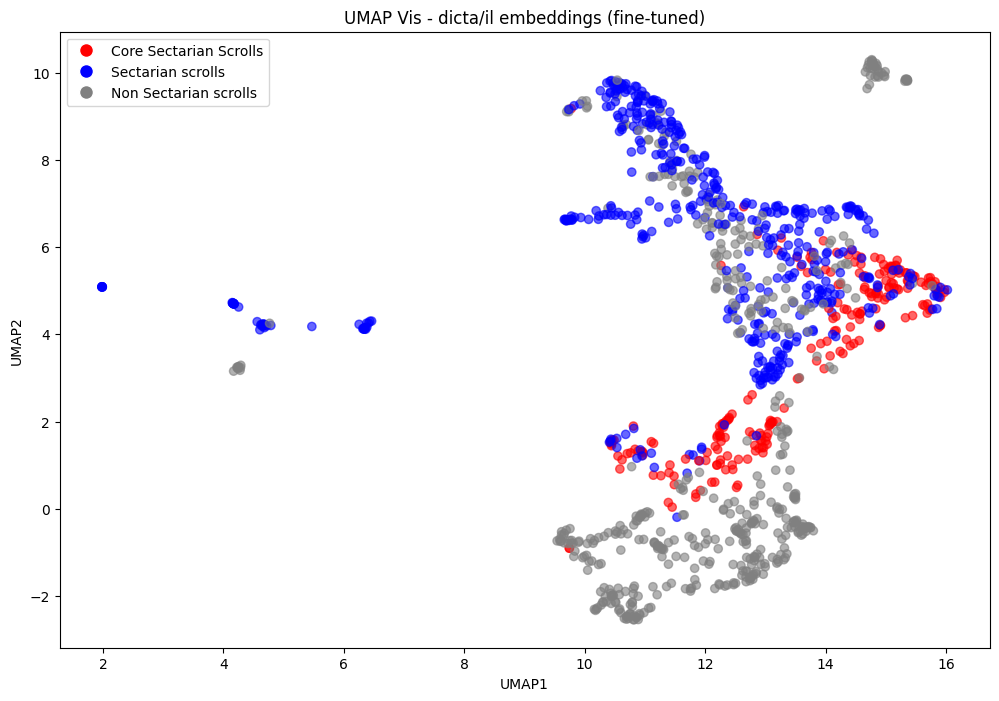

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import umap

embeddings = processed_vectorizers[vectorizers[1]]
# Create UMAP model and fit-transform the data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Create a color array
colors = np.full(len(df), 'gray')  # Default color for all other points




# Color sectarian sections
sectarian_mask = df['section'] == 'sectarian_texts'
colors[sectarian_mask] = 'blue'

# Color core sectarian scrolls
core_sec_mask = df['book'].isin(core_sec_scrolls)
colors[core_sec_mask] = 'red'

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=colors, alpha=0.6)

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Core Sectarian Scrolls',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Sectarian scrolls',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Non Sectarian scrolls',
                              markerfacecolor='gray', markersize=10)]
plt.legend(handles=legend_elements, loc='best')

plt.title('UMAP Vis - dicta/il embeddings (fine-tuned)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.show()

/Users/yonatanlou/.pyenv/versions/3.10.0/envs/QumranNLP/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


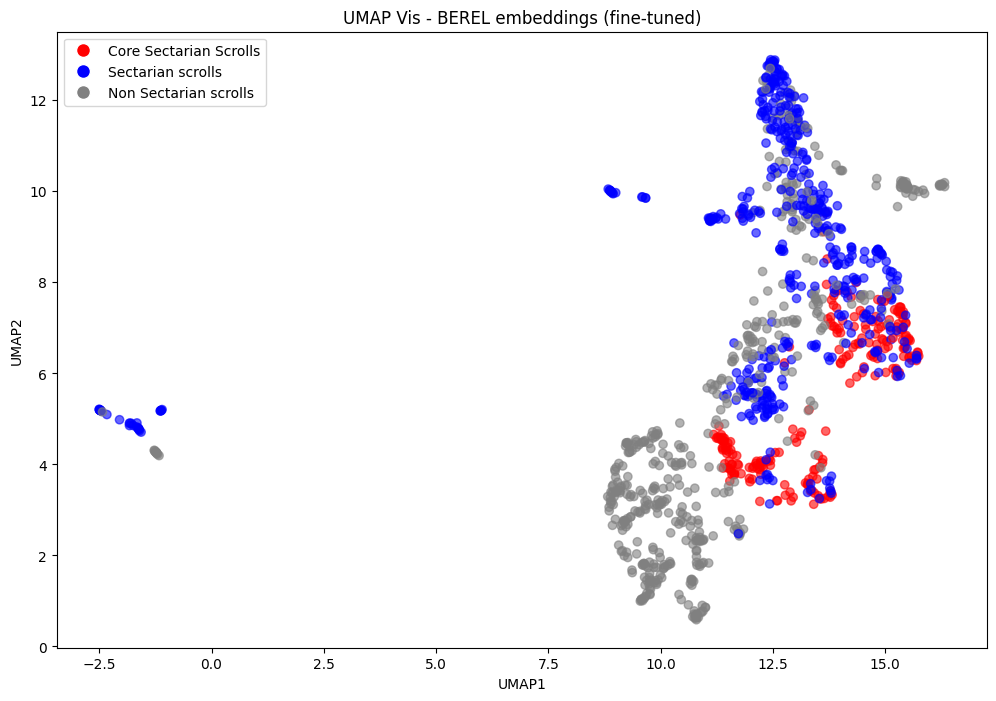

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import umap

embeddings = processed_vectorizers[vectorizers[0]]
# Create UMAP model and fit-transform the data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embeddings = umap_model.fit_transform(embeddings)

# Create a color array
colors = np.full(len(df), 'gray')  # Default color for all other points




# Color sectarian sections
sectarian_mask = df['section'] == 'sectarian_texts'
colors[sectarian_mask] = 'blue'

# Color core sectarian scrolls
core_sec_mask = df['book'].isin(core_sec_scrolls)
colors[core_sec_mask] = 'red'

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=colors, alpha=0.6)

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Core Sectarian Scrolls',
                              markerfacecolor='red', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Sectarian scrolls',
                              markerfacecolor='blue', markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Non Sectarian scrolls',
                              markerfacecolor='gray', markersize=10)]
plt.legend(handles=legend_elements, loc='best')

plt.title('UMAP Vis - BEREL embeddings (fine-tuned)')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.show()